Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# loading the data
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
# printing the first 5 row of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# number of rows and columns in the dataset
df.shape

(10000, 14)

In [5]:
# dropping unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Data Preprocessing

In [9]:
encoder=LabelEncoder()

In [10]:
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7028,718,1,1,26,7,147527.03,1,0,0,51099.56,0
2915,489,1,0,52,1,131441.51,1,1,0,37240.11,1
771,717,0,1,31,4,129722.57,1,0,0,41176.60,0
8159,461,2,0,25,6,0.00,2,1,1,15306.29,0
8826,412,0,1,29,5,0.00,2,0,0,12510.53,0


In [13]:
df = pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [14]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [15]:
X = df.drop(columns=['Exited'],axis=1).values
y = df['Exited'].values

In [16]:
X

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 1.1254258e+05,
        0.0000000e+00, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 4.2085580e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 9.2888520e+04,
        1.0000000e+00, 0.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 3.8190780e+04,
        0.0000000e+00, 0.0000000e+00]])

In [17]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X

array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.02188649,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, ...,  0.21653375,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.2406869 ,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ..., -1.00864308,
        -0.57873591, -0.57380915],
       [ 1.25683526,  0.91241915,  0.29351742, ..., -0.12523071,
         1.72790383, -0.57380915],
       [ 1.46377078, -1.09598752, -1.04143285, ..., -1.07636976,
        -0.57873591, -0.57380915]])

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 4ms/step - loss: 0.5493 - accuracy: 0.7836 - val_loss: 0.5019 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7958 - val_loss: 0.4570 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7989 - val_loss: 0.4370 - val_accuracy: 0.8037
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8120 - val_loss: 0.4243 - val_accuracy: 0.8131
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8189 - val_loss: 0.4157 - val_accuracy: 0.8119
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8253 - val_loss: 0.4075 - val_accuracy: 0.8181
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8339 - val_loss: 0.3984 - val_accuracy: 0.8338

In [25]:
y_pred =  model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

63/63 [==============================] - 0s 1ms/step


In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
accuracy_score(y_test,y_pred)

0.7975

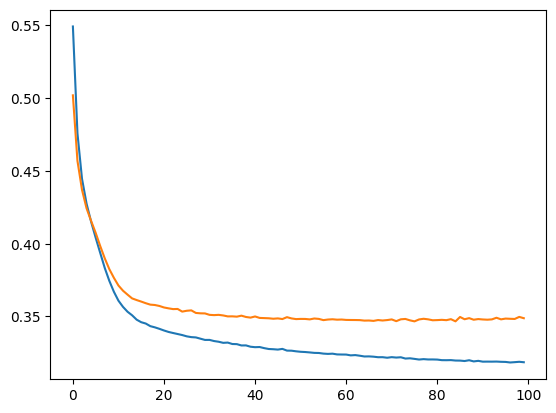

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [29]:
history.history['accuracy']

[0.7835937738418579,
 0.7957812547683716,
 0.7989062666893005,
 0.8120312690734863,
 0.8189062476158142,
 0.8253124952316284,
 0.8339062333106995,
 0.8392187356948853,
 0.8470312356948853,
 0.8517187237739563,
 0.8531249761581421,
 0.8529687523841858,
 0.8567187786102295,
 0.8584374785423279,
 0.8587499856948853,
 0.8595312237739563,
 0.8600000143051147,
 0.8592187762260437,
 0.858593761920929,
 0.8609374761581421,
 0.8612499833106995,
 0.8626562356948853,
 0.8618749976158142,
 0.8626562356948853,
 0.8626562356948853,
 0.8643749952316284,
 0.8635937571525574,
 0.8626562356948853,
 0.8629687428474426,
 0.8648437261581421,
 0.8637499809265137,
 0.8637499809265137,
 0.8634374737739563,
 0.864062488079071,
 0.8645312786102295,
 0.8643749952316284,
 0.862500011920929,
 0.8631250262260437,
 0.8642187714576721,
 0.86328125,
 0.8639062643051147,
 0.8657812476158142,
 0.864062488079071,
 0.8646875023841858,
 0.864062488079071,
 0.8659374713897705,
 0.8648437261581421,
 0.8667187690734863,
 0.86

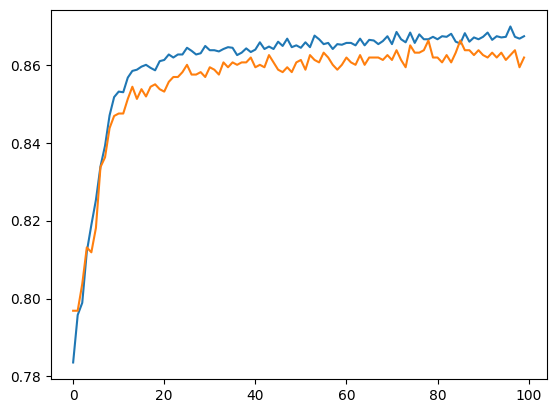

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])